### Importing the Libraries

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Erosion

In [87]:
def apply_erosion_operation(image, structuring_element):
    eroded_image = []
    image //= 255
    offset = structuring_element.shape[1] // 2
    height, width = image.shape

    for r in range(height):
        nth_row = []
        for c in range(width):
            fit = True
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (structuring_element[x, y] == 1 and image[r + x, c + y] != structuring_element[x, y]):
                            fit = False
            pixel = 1 if fit else 0
            nth_row.append(pixel)
        eroded_image.append(nth_row)

    image = image * 255
    eroded_image = np.uint8(eroded_image)
    return eroded_image * 255

### Function for Boundary Extraction

In [88]:
def extract_boundary(main_image, structuring_element):
    image = main_image.copy()
    eroded_image = apply_erosion_operation(image, structuring_element)
    return main_image - eroded_image

### Creating Structuring Element for Erosion & Dilation

In [89]:
structuring_element_size = 3
structuring_element = np.ones((structuring_element_size, structuring_element_size))
structuring_element = np.uint8(structuring_element)

### Loading the Original Image

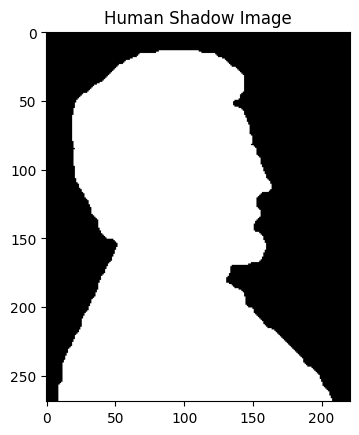

In [90]:
human_shadow_image = cv2.imread("./Fig0914(a) Lincoln From Penny 221x269.tif", 0)
plt.imshow(cv2.cvtColor(human_shadow_image, cv2.COLOR_BGR2RGB))
plt.title("Human Shadow Image")
plt.show()

### Applying Boundary Extraction

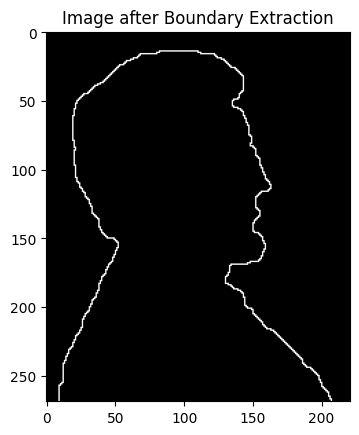

In [91]:
boundary_extracted_image = extract_boundary(human_shadow_image, structuring_element)
plt.imshow(cv2.cvtColor(boundary_extracted_image, cv2.COLOR_BGR2RGB))
plt.title("Image after Boundary Extraction")
plt.show()